<a href="https://colab.research.google.com/github/Gnkhakimova/CS5590-BigData/blob/master/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House price prediction using Deep Learning 

In [0]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [0]:
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [0]:
from sklearn import preprocessing

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))




Train on 1022 samples, validate on 219 samples
Epoch 1/100





1022/1022 [==============================] - 6s 5ms/step - loss: 0.7022 - acc: 0.4041 - val_loss: 0.6918 - val_acc: 0.4840
Epoch 2/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.6882 - acc: 0.5793 - val_loss: 0.6784 - val_acc: 0.6575
Epoch 3/100
1022/1022 [==============================] - 0s 174us/step - loss: 0.6769 - acc: 0.6282 - val_loss: 0.6675 - val_acc: 0.6667
Epoch 4/100
1022/1022 [==============================] - 0s 155us/step - loss: 0.6668 - acc: 0.6243 - val_loss: 0.6580 - val_acc: 0.7078
Epoch 5/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.6574 - acc: 0.6898 - val_loss: 0.6492 - val_acc: 0.7443
Epoch 6/100
1022/1022 [==============================] - 0s 138us/step - loss: 0.6484 - acc: 0.7133 - val_loss: 0.6413 - val_acc: 0.7671
Epoch 7/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.6402 - acc: 0.7417 - val_loss: 0.6342 - val_

In [19]:

model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 111us/step


0.8858447469532762

In [0]:
import matplotlib.pyplot as plt

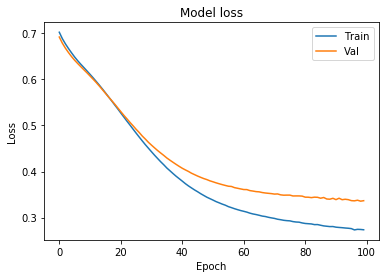

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

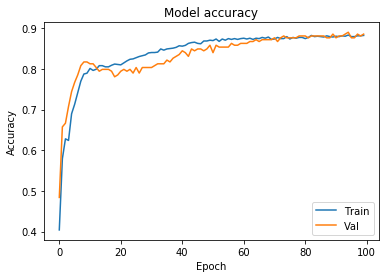

In [22]:

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 660us/step - loss: 0.4904 - acc: 0.7818 - val_loss: 0.3972 - val_acc: 0.8219
Epoch 2/100
1022/1022 [==============================] - 0s 202us/step - loss: 0.3360 - acc: 0.8620 - val_loss: 0.4316 - val_acc: 0.8311
Epoch 3/100
1022/1022 [==============================] - 0s 250us/step - loss: 0.2927 - acc: 0.8699 - val_loss: 0.3489 - val_acc: 0.8584
Epoch 4/100
1022/1022 [==============================] - 0s 243us/step - loss: 0.2777 - acc: 0.8836 - val_loss: 0.3621 - val_acc: 0.8584
Epoch 5/100
1022/1022 [==============================] - 0s 216us/step - loss: 0.2586 - acc: 0.8708 - val_loss: 0.3815 - val_acc: 0.8676
Epoch 6/100
1022/1022 [==============================] - 0s 214us/step - loss: 0.2618 - acc: 0.8865 - val_loss: 0.6299 - val_acc: 0.8447
Epoch 7/100
1022/1022 [==============================] - 0s 211us/step - loss: 0.3526 - acc: 0.8523 - val_loss: 0.4250 - val_acc: 0

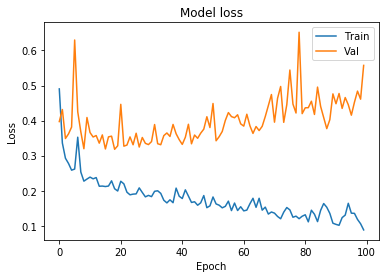

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

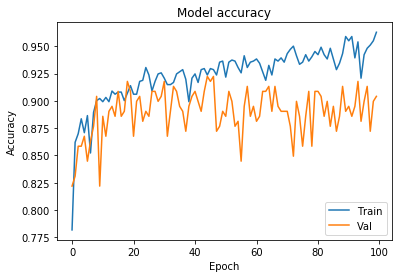

In [25]:

plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
from keras.layers import Dropout
from keras import regularizers

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 14.7556 - acc: 0.6037 - val_loss: 4.0823 - val_acc: 0.8356
Epoch 2/100
1022/1022 [==============================] - 0s 244us/step - loss: 1.7303 - acc: 0.8454 - val_loss: 0.7655 - val_acc: 0.8082
Epoch 3/100
1022/1022 [==============================] - 0s 218us/step - loss: 0.5958 - acc: 0.8444 - val_loss: 0.5451 - val_acc: 0.8539
Epoch 4/100
1022/1022 [==============================] - 0s 215us/step - loss: 0.5081 - acc: 0.8659 - val_loss: 0.5746 - val_acc: 0.8539
Epoch 5/100
1022/1022 [==============================] - 0s 244us/step - loss: 0.4859 - acc: 0.8718 - val_loss: 0.5261 - val_acc: 0.8630
Epoch 6/100
1022/1022 [==============================] - 0s 267us/step - loss: 0.4678 - acc: 0.8855 - val_loss: 0.5063 - val_acc: 0.8721
Epoch 7/100
1022/1022 [==============================] - 0s 236us/step - loss: 0.4985 - acc: 0.8708 - val_loss: 0.5101 - val_acc: 0.

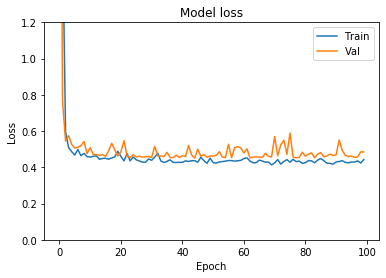

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

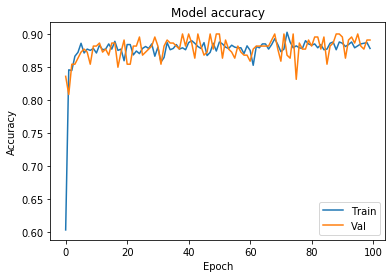

In [30]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()